In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
teams = pd.read_csv('teams.csv')
print(teams.head())

  team      country  year  events  athletes   age  height  weight  medals  \
0  AFG  Afghanistan  1964       8         8  22.0   161.0    64.2       0   
1  AFG  Afghanistan  1968       5         5  23.2   170.2    70.0       0   
2  AFG  Afghanistan  1972       8         8  29.0   168.3    63.8       0   
3  AFG  Afghanistan  1980      11        11  23.6   168.4    63.2       0   
4  AFG  Afghanistan  2004       5         5  18.6   170.8    64.8       0   

   prev_medals  prev_3_medals  
0          0.0            0.0  
1          0.0            0.0  
2          0.0            0.0  
3          0.0            0.0  
4          0.0            0.0  


In [38]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [41]:
teams.corr(numeric_only="true")["medals"]

,medals
year,-0.021603
athletes,0.840817
age,0.025096
prev_medals,0.920048
medals,1.000000


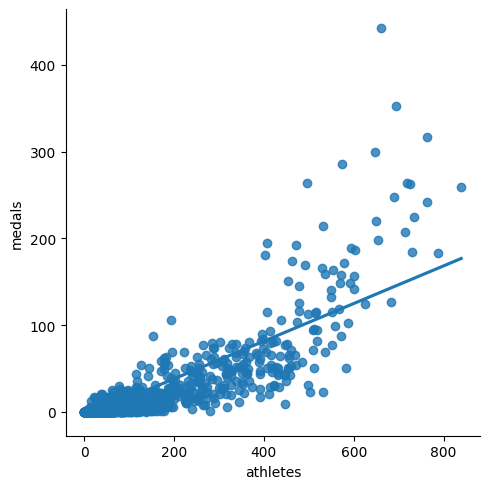

In [42]:
sns.lmplot(x='athletes', y='medals', data=teams, fit_reg=True, ci=None)

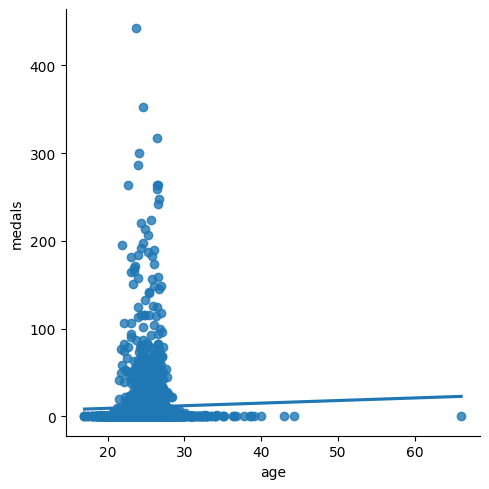

In [43]:
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

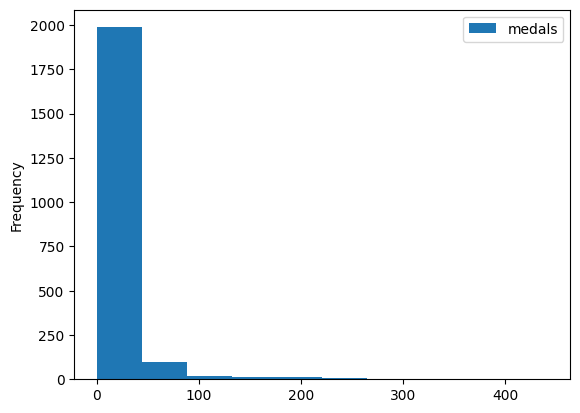

In [44]:
teams.plot.hist(y='medals')

In [45]:
teams[teams.isnull().any(axis=1)].head(20)

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


In [46]:
teams = teams.dropna()

In [47]:
teams.shape

(2014, 7)

In [48]:
train = teams[teams.year < 2012].copy()
test = teams[teams.year >= 2012].copy()

In [49]:
train.shape

(1609, 7)

In [50]:
test.shape

(405, 7)

In [51]:
#Testing for Accuracy Metric(s)
#-Use MSE

In [52]:
reg = LinearRegression()

In [53]:
predictors = ["athletes", "prev_medals"]

In [54]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [55]:
predictions = reg.predict(test[predictors])

In [56]:
predictions.shape

(405,)

In [58]:
test["predictions"] = predictions

In [59]:
test.loc[test['predictions'] < 0, 'predictions'] = 0

In [60]:
test['predictions'] = test['predictions'].round()

In [61]:
error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [62]:
teams.describe()['medals']

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


In [63]:
test['predictions'] = predictions

In [64]:
test['team'] = teams['team']
test[test['team'] == 'USA']

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.210121
2054,USA,United States,2016,719,26.4,248.0,264,235.568076


In [67]:
test[test['team'] == 'IRL']

,team,country,year,athletes,age,prev_medals,medals,predictions
937,IRL,Ireland,2012,76,28.5,3.0,5,5.559295
938,IRL,Ireland,2016,93,28.4,5.0,3,8.279510


In [68]:
errors = (test["medals"] - predictions).abs()

In [71]:
error_byteam = errors.groupby(test['team']).mean()
medals_byteam = test['medals'].groupby(test['team']).mean()
error_ratio = error_byteam / medals_byteam
error_ratio.sort_values(ascending=False)
error_ratio = error_ratio[np.isfinite(error_ratio)]

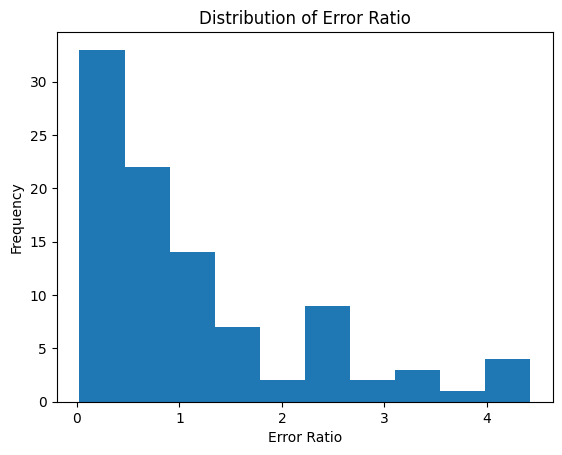

In [76]:
error_ratio.plot.hist()
plt.xlabel("Error Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Error Ratio")
plt.show()

In [73]:
error_ratio.sort_values()

,medals
team,
FRA,0.024289
CAN,0.050844
NZL,0.071349
RUS,0.081841
ITA,0.119537
...,...
PHI,3.563248
JOR,4.065175
BDI,4.136878


In [77]:
#This model works well for countries which have a high medal count, and compete in a stable number of events annually.
#Countries with lower medal counts have a harder time getting an accurate prediction (due to low data/medals accrued).

In [79]:
#Re-Doing With Additional Predictors - Age

In [82]:
predictors = ["athletes", "prev_medals", 'age']

In [83]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [84]:
predictions = reg.predict(test[predictors])

In [85]:
predictions.shape

(405,)

In [86]:
test["predictions"] = predictions

In [87]:
test.loc[test['predictions'] < 0, 'predictions'] = 0

In [88]:
test['predictions'] = test['predictions'].round()

In [89]:
error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2790123456790123

In [90]:
teams.describe()['medals']

,medals
count,2144.000000
mean,10.556437
std,33.028143
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,442.000000


In [91]:
test['predictions'] = predictions

In [92]:
test['team'] = teams['team']
test[test['team'] == 'USA']

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.099698
2054,USA,United States,2016,719,26.4,248.0,264,235.464034


In [93]:
errors = (test["medals"] - predictions).abs()

In [94]:
error_byteam = errors.groupby(test['team']).mean()
medals_byteam = test['medals'].groupby(test['team']).mean()
error_ratio = error_byteam / medals_byteam
error_ratio.sort_values(ascending=False)
error_ratio = error_ratio[np.isfinite(error_ratio)]

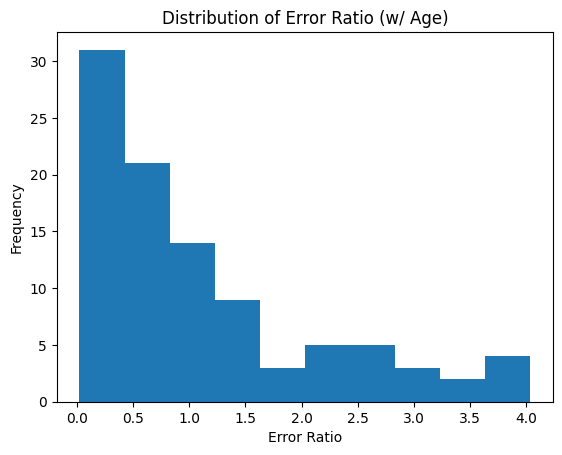

In [95]:
error_ratio.plot.hist()
plt.xlabel("Error Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Error Ratio (w/ Age)")
plt.show()